# Lab Assignment 2



### Nikitin, s2892847

## Presentation and coding style (3 marks)

In this assignment, some marks are allocated to your coding style and presentation. Try to make your code more readable using the tips given in your computer lab 2. Make sure your figures have good quality, right size, good range and proper labels.

## Task 1 (4 marks)

In this task we try to use several method from Lab 2 to solve the initial value problem 

\begin{equation}
y' = 4t-3y, \quad y(0)=1,
\end{equation}

Set the step size to $h = 0.05$ and numerically solve this ODE from $t=0$ to $0.5$ using the following methods:

- Forward Euler 

- Adams–Bashforth order 2

- Adams–Bashforth order 3 (we did not code this method in the computer lab, but you can find the formula in the document 'numerical_ODEs' on Learn page in Skills/Skills Lab2 or on [this wikipedia page](https://en.wikipedia.org/wiki/Linear_multistep_method)). For this method, you need to build the very first two steps using other methods. For the first step, use the Euler scheme. For the second step, use Adams–Bashforth order 2. 


Plot the three different approximations, and display the values in a table.

In [2]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt
# to create functions for methods I will follow the same steps as in workshop adjusting formulas 
def ode_Euler(func, times, y0):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       
    nT = times.size   
    y = np.zeros([nT,n])
    y[0, :] = y0
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y

def ode_AB2(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Other steps
    for k in range(1, nSteps):
        y[k+1,:] = y[k,:] + (1.5*func(y[k, :], times[k])-0.5*func(y[k-1, :], times[k-1]))*dt      
    return y, times 

def ode_AB3(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size
    dt = (finalTime - initialTime)/nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt*func(y[0, :], times[0])
    # Second step using Adams–Bashforth order 2
    y[2,:] = y[1,:] + (1.5*func(y[1, :], times[1])-0.5*func(y[0, :], times[0]))*dt
    for k in range(2, nSteps):
        y[k+1,:] = y[k,:] + ((23/12)*func(y[k, :], times[k])-(16/12)*func(y[k-1, :], times[k-1])+(5/12)*func(y[k-2,:], times[k-2]))*dt      
    return y, times

def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

In [3]:
# standardised funtions 
def Euler_step(func, start, stop, h, ics): 
    times = timesteps(start, stop, h)
    y_values = ode_Euler(func, times, ics)
    return y_values, times

def AB2_step(func, start, stop, h, ics): 
    nSteps = math.ceil((stop - start) / h)
    y_values, times = ode_AB2(func, start, stop, nSteps, ics)
    return y_values, times

def AB3_step(func, start, stop, h, ics): 
    nSteps = math.ceil((stop - start) / h)
    y_values, times = ode_AB3(func, start, stop, nSteps, ics)
    return y_values, times

In [7]:
# defining the function in the RHS of the ODE given in the question
def dy_dt(y,t): 
    return 4*t-3*y
    
# now define sets of estimated function values for each method
y_Euler = Euler_step(dy_dt, 0, 0.5, 0.05, 1)[0]
y_AB2 = AB2_step(dy_dt, 0, 0.5, 0.05, 1)[0]
y_AB3 = AB3_step(dy_dt, 0, 0.5, 0.05, 1)[0]

time = timesteps(0, 0.5, 0.05)

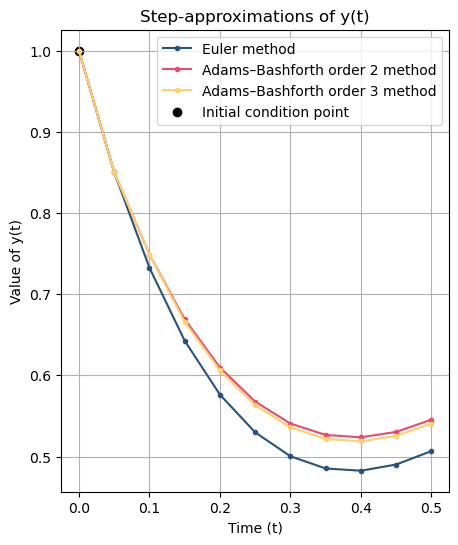

In [8]:
from pandas import DataFrame

# plot the results
fig, ax = plt.subplots(figsize=(5, 6))

#Colours were selected due to better visual harmony 
ax.plot(time, y_Euler, color = '#26547c', label = 'Euler method', marker='o',  markersize=3)
ax.plot(time, y_AB2, color='#ef476f', label = 'Adams–Bashforth order 2 method', marker='o',  markersize=3)
ax.plot(time, y_AB3, color='#ffd166', label ='Adams–Bashforth order 3 method', marker='o',  markersize=3)
ax.scatter(0,1, color = 'black', label = 'Initial condition point')

ax.set_xlabel("Time (t)")
ax.set_ylabel("Value of y(t)")
ax.legend()
ax.grid()
plt.title("Step-approximations of y(t)")
plt.show()


In [9]:
# printing the solution in a table
# as y_method has 2 dimensions since it looks like array([[],[],[],...]) we need to bring it to one dimension using .ravel()
y_Euler = y_Euler.ravel()
y_AB2 = y_AB2.ravel()
y_AB3 = y_AB3.ravel()

# I find it easier to define data in form of a dictionary 
df = DataFrame({'t': time,'Euler': y_Euler, 'Adams–Bashforth order 2': y_AB2, 'Adams–Bashforth order 3': y_AB3})

# Display the table
# Hide the index column for aesthetical reasons 
display(df.style.hide(axis="index"))

t,Euler,Adams–Bashforth order 2,Adams–Bashforth order 3
0.000000,1.000000,1.000000,1.000000
0.050000,0.850000,0.850000,0.850000
0.100000,0.732500,0.748750,0.748750
0.150000,0.642625,0.669031,0.665984
0.200000,0.576231,0.609655,0.606139
0.250000,0.529797,0.567660,0.563274
0.300000,0.500327,0.540661,0.535936
0.350000,0.485278,0.526587,0.521626
0.400000,0.482486,0.523654,0.518641
0.450000,0.490113,0.530326,0.525361


## Task 2 (3 marks)

Use `SymPy` to solve the differential equation $y' = 4t-3y$, with $y(0)=1$, present the analytical solution. What is the value $y(0.5)$? 

Compare the result with the approximations from the three methods in Task 1. You may use a table to show the results of each method at $y(0.5)$. Which method is the most/least accurate? Why?

The equation


has solutions


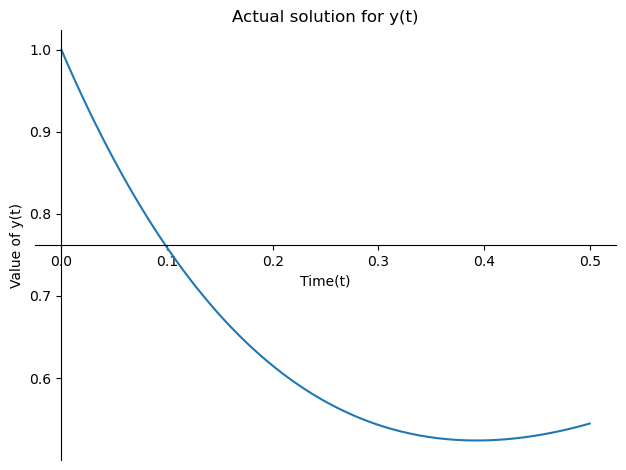

In [10]:
#standard setup
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot

#Use the same method as from Lab1
t = sym.symbols('t')
y = sym.Function('y')
eq = sym.Eq(y(t).diff(t),4*t-3*y(t)) 
print("The equation")
display_latex(eq)

eqsol = sym.dsolve(eq, y(t), ics={y(0):1})
print("has solutions")
display_latex(eqsol)


graph2 = sym_plot.plot(eqsol.rhs, (t,0,0.5), xlabel = 'Time(t)', ylabel = 'Value of y(t)', show=False)
graph2.title = 'Actual solution for y(t)'
graph2.show()

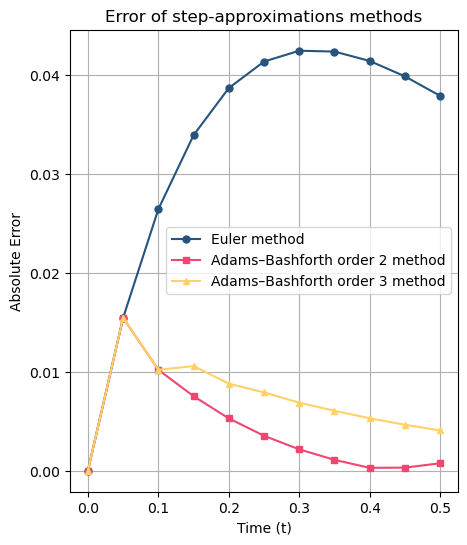

In [16]:
y_step = np.array([eqsol.rhs.subs(t, i) for i in time])

error_Euler = np.abs(y_Euler - y_step)
error_AB2 = np.abs(y_AB2 - y_step)
error_AB3 = np.abs(y_AB3 - y_step)

fig, ax = plt.subplots(figsize=(5, 6))

#Colours were selected due to better visual harmony 
ax.plot(time, error_Euler, color = '#26547c', label = 'Euler method', marker='o',  markersize=5)
ax.plot(time, error_AB2, color='#ef476f', label = 'Adams–Bashforth order 2 method', marker='s',  markersize=5)
ax.plot(time, error_AB3, color='#ffd166', label ='Adams–Bashforth order 3 method', marker='^',  markersize=5)

ax.set_xlabel("Time (t)")
ax.set_ylabel("Absolute Error")
ax.legend()
ax.grid()
plt.title("Error of step-approximations methods")
plt.show()

Write your answer here!
I suppose that while AB3 should theoretically perform better than AB2: $O(h^3)$ against $O(h^2)$. However, during first iterations AB3 brings errors from two previous steps not just one as AB2, which on the short interval like that makes AB2 more precise. 